In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
data_all = pd.read_csv("Power_Threat_CLTLtest_1.csv")

In [4]:
data_partial = pd.read_csv("Power_Threat_CLTLtest_2.csv")

In [48]:
data_crowd = pd.read_csv("new_big_annotation_stance.csv")

In [5]:
filter_col = [col for col in data_all.columns if '_' in col]
filter_col = [col for col in filter_col if "PID" not in col]
filter_col = [col for col in filter_col if "ImportId" not in col]
filter_col = [col for col in filter_col if "below" not in col]

In [6]:
data_all.columns, data_all.iloc[0] = data_all.iloc[0].to_list(), data_all.columns

In [7]:
data_all.columns = data_all.columns.str.split("-").str[0]
data_all.rename(columns={ data_all.columns[17]: "consent" }, inplace = True)

In [50]:
data_annotations = data_all[2:]
transposed_annotations = data_annotations.T
# transposed_annotations.columns = transposed_annotations.iloc[17]
transposed_annotations = transposed_annotations[18:]

In [51]:
transposed_annotations.columns

RangeIndex(start=2, stop=13, step=1)

#### Threat

In [60]:
power_annotations = transposed_annotations[transposed_annotations[2].str.contains('IMPACT').fillna(False)]

In [61]:
print(len(power_annotations))

21


In [62]:
power_annotations[-1:]

,2,3,4,5,6,7,8,9,10,11,12
101,The comment expresses feeling NO IMPACT,The comment expresses feeling NO IMPACT,The comment expresses feeling NO IMPACT,The comment expresses feeling NO IMPACT,The comment expresses feeling NO IMPACT,The comment expresses feeling NO IMPACT,The comment expresses feeling NO IMPACT,NaN,The comment expresses feeling NO IMPACT,The comment has NOT MENTIONED IMPACT,The comment expresses feeling NO IMPACT


In [14]:
threat_annotations = transposed_annotations[transposed_annotations[2].str.contains('THREAT').fillna(False)]

In [15]:
print(len(threat_annotations))

18


In [16]:
threat_annotations[:5]

,2,3,4,5,6,7,8,9,10,11,12
3492674532,The comment has NOT MENTIONED THREAT,NaN,NaN,NaN,NaN,The comment expresses feeling THREAT,NaN,NaN,NaN,NaN,NaN
3492674533,The comment has NOT MENTIONED THREAT,NaN,NaN,The comment has NOT MENTIONED THREAT,NaN,The comment has NOT MENTIONED THREAT,The comment has NOT MENTIONED THREAT,NaN,The comment expresses feeling NO THREAT,NaN,NaN
3492674534,The comment has NOT MENTIONED THREAT,NaN,NaN,NaN,NaN,The comment has NOT MENTIONED THREAT,NaN,NaN,NaN,NaN,NaN
3492674535,The comment has NOT MENTIONED THREAT,NaN,NaN,The comment has NOT MENTIONED THREAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3492674537,The comment expresses feeling THREAT,NaN,NaN,The comment has NOT MENTIONED THREAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
threat_annotations = threat_annotations.replace("The comment expresses feeling THREAT", 1)
threat_annotations = threat_annotations.replace("The comment expresses feeling NO THREAT", 2)
threat_annotations = threat_annotations.replace("The comment has NOT MENTIONED THREAT", 0)
threat_annotations = threat_annotations.fillna(99)

In [44]:
threat_annotations

,2,3,4,5,6,7,8,9,10,11,12
3492674532,0,99.0,99.0,99.0,99.0,1.0,99.0,99.0,99.0,99.0,99.0
3492674533,0,99.0,99.0,0.0,99.0,0.0,0.0,99.0,2.0,99.0,99.0
3492674534,0,99.0,99.0,99.0,99.0,0.0,99.0,99.0,99.0,99.0,99.0
3492674535,0,99.0,99.0,0.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
3492674537,1,99.0,99.0,0.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
3492674539,0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
3492674540,0,99.0,99.0,99.0,99.0,0.0,99.0,99.0,1.0,99.0,99.0
3492674544,0,99.0,99.0,0.0,99.0,99.0,99.0,99.0,0.0,99.0,99.0
3492674549,0,99.0,99.0,99.0,99.0,1.0,99.0,99.0,1.0,99.0,99.0
3492674550,0,99.0,99.0,99.0,99.0,2.0,99.0,99.0,0.0,99.0,99.0


In [75]:
threat_3 = threat_annotations[[2, 7]].astype(int)

In [84]:
y_1 = threat_3[[2]].values
y_2 = threat_3[[7]].values

In [69]:
power_annotations = power_annotations.replace("The comment expresses feeling IMPACT", 1)
power_annotations = power_annotations.replace("The comment expresses feeling NO IMPACT", 2)
power_annotations = power_annotations.replace("The comment has NOT MENTIONED IMPACT", 0)
power_annotations = power_annotations.fillna(99)

In [70]:
power_annotations

,2,3,4,5,6,7,8,9,10,11,12
3492674532,2,0,2,0,0.0,2,2,99.0,2,99.0,99.0
3492674533,2,2,0,2,0.0,0,0,0.0,2,99.0,2.0
3492674534,0,0,1,0,1.0,1,0,1.0,1,99.0,1.0
3492674535,0,0,0,0,99.0,1,0,1.0,1,1.0,1.0
3492674537,0,0,1,1,0.0,1,0,2.0,2,99.0,0.0
3492674539,0,2,1,0,0.0,1,0,1.0,0,99.0,2.0
3492674540,0,2,0,0,0.0,0,0,99.0,1,99.0,99.0
3492674541,0,1,0,0,0.0,0,0,99.0,0,99.0,0.0
3492674542,2,0,2,0,0.0,2,0,1.0,1,99.0,0.0
3492674544,0,0,0,0,0.0,0,0,99.0,0,99.0,0.0


In [65]:
power_5 = power_annotations[[2, 3, 4, 5]]

In [66]:
from statsmodels.stats import inter_rater as irr
irr.fleiss_kappa(irr.aggregate_raters(power_5)[0], method='fleiss')

0.2555970149253733

In [86]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_1, y_2)

0.16279069767441867

In [78]:
from statsmodels.stats import inter_rater as irr
irr.cohens_kappa(irr.aggregate_raters(threat_3)[0])

ValueError: operands could not be broadcast together with shapes (18,) (4,) 

In [64]:
power_annotations["mode"] = power_annotations.mode(axis=1)[0]

In [65]:
threat_annotations["mode"] = threat_annotations.mode(axis=1)[0]

In [66]:
power_annotations["mode"].value_counts()

0.0    13
2.0     4
1.0     4
Name: mode, dtype: int64

In [113]:
threat_annotations = threat_annotations[['5f3c4372d64ff120268a0b0b', '62b2476fc924f1a048bd412b', '592fbec4cf0d9600010e8a89', '594ee6531ebf4800018a4854', '60d432ce6e413e7509dd4b78']]

In [87]:
threat_3

,2,7
3492674532,0,1
3492674533,0,0
3492674534,0,0
3492674535,0,99
3492674537,1,99
3492674539,0,99
3492674540,0,0
3492674544,0,99
3492674549,0,1
3492674550,0,2


In [32]:
irr.fleiss_kappa(irr.aggregate_raters(threat_3)[0], method='fleiss')

0.0018957345971564149

In [33]:
irr.fleiss_kappa(irr.aggregate_raters(power_5)[0], method='fleiss')

0.19310490693739424

In [36]:
data_threat = irr.aggregate_raters(threat_3)[0]
                        
percentages_threat = []

for i in data_threat:
    percentages_threat.append(max(i)/3)

In [90]:
percentages_threat[16]

0.6666666666666666

In [37]:
import statistics
statistics.mean(percentages_threat)

0.5925925925925926

In [38]:
statistics.median(percentages_threat)

0.6666666666666666

In [39]:
statistics.mode(percentages_threat)

0.6666666666666666

In [99]:
power_annotations = power_annotations[['5f3c4372d64ff120268a0b0b', '62b2476fc924f1a048bd412b', '592fbec4cf0d9600010e8a89', '594ee6531ebf4800018a4854', '60d432ce6e413e7509dd4b78']]

In [40]:
irr.fleiss_kappa(irr.aggregate_raters(power_5)[0], method='fleiss')

0.19310490693739424

In [41]:
data_power = irr.aggregate_raters(power_5)[0]
                        
percentages_power = []

for i in data_power:
    percentages_power.append(max(i)/5)

In [42]:
statistics.mean(percentages_power)

0.6666666666666666

In [43]:
statistics.median(percentages_power)

0.6

In [104]:
statistics.mode(percentages_power)

0.6

## Do informative agreement analysis

### Discussion topic?

In [49]:
discussion_topic_annotations[:5]

NameError: name 'discussion_topic_annotations' is not defined

In [161]:
majority_annotator = discussion_topic_annotations.mode(axis='columns').values.tolist()

In [162]:
annotator_1 = list(discussion_topic_annotations['63d3fd1b0a21df494a093c51'])
annotator_2 = list(discussion_topic_annotations['5f60bbdf0c4792015f140d30'])
annotator_3 = list(discussion_topic_annotations['612f36ffdba08ffd6032560a'])
annotator_4 = list(discussion_topic_annotations['613f25c7b60b1f9c170a6db3'])
annotator_5 = list(discussion_topic_annotations['615a0198a1a2d449a781b8a5'])

### individuals w majority

[Text(0.5, 13.5, 'Annotator1'), Text(31.5, 0.5, 'majority_annotator')]

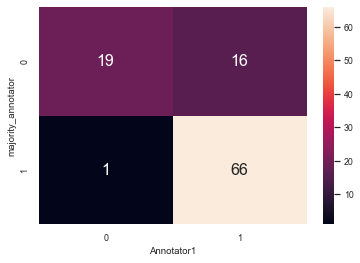

In [168]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_1, majority_annotator)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator1",
       ylabel="majority_annotator")    

[Text(0.5, 13.5, 'Annotator1'), Text(31.5, 0.5, 'majority_annotator')]

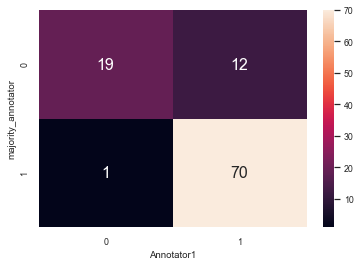

In [170]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_2, majority_annotator)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator1",
       ylabel="majority_annotator")    

[Text(0.5, 13.5, 'Annotator1'), Text(31.5, 0.5, 'majority_annotator')]

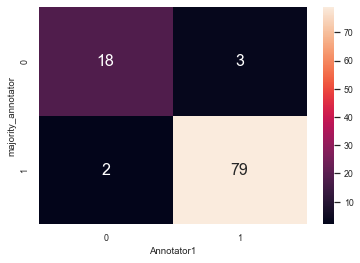

In [171]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_3, majority_annotator)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator1",
       ylabel="majority_annotator")    

[Text(0.5, 13.5, 'Annotator1'), Text(31.5, 0.5, 'majority_annotator')]

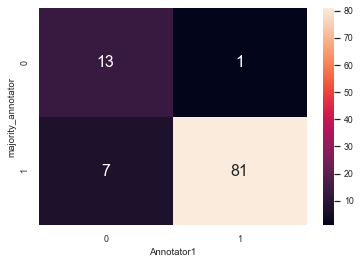

In [172]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_4, majority_annotator)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator1",
       ylabel="majority_annotator")    

[Text(0.5, 13.5, 'Annotator1'), Text(31.5, 0.5, 'majority_annotator')]

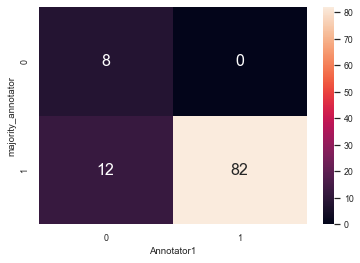

In [173]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_5, majority_annotator)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator1",
       ylabel="majority_annotator")    

### each individual in pairs

[Text(0.5, 13.5, 'Annotator1'), Text(31.5, 0.5, 'Annotator2')]

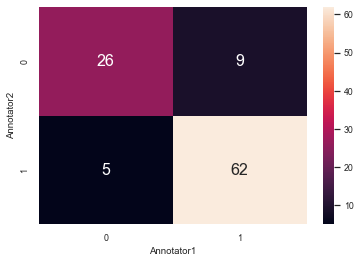

In [128]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_1, annotator_2)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator1",
       ylabel="Annotator2")    

[Text(0.5, 13.5, 'Annotator2'), Text(31.5, 0.5, 'Annotator3')]

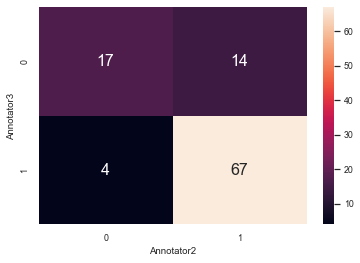

In [164]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_2, annotator_3)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator2",
       ylabel="Annotator3")   

[Text(0.5, 13.5, 'Annotator3'), Text(31.5, 0.5, 'Annotator4')]

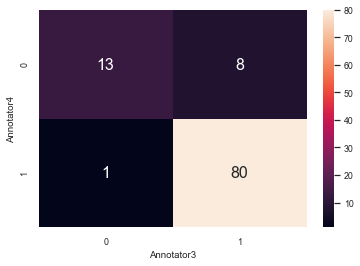

In [166]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_3, annotator_4)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator3",
       ylabel="Annotator4")   

[Text(0.5, 13.5, 'Annotator3'), Text(31.5, 0.5, 'Annotator4')]

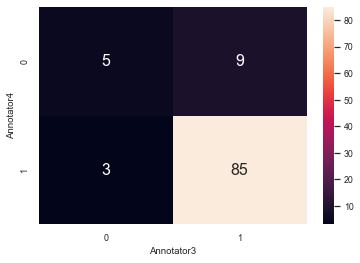

In [167]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_4, annotator_5)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator3",
       ylabel="Annotator4")   

### stance

In [175]:
stance_annotations[:2]

What is your Prolific ID? Please note that this response should auto,63d3fd1b0a21df494a093c51,5f60bbdf0c4792015f140d30,612f36ffdba08ffd6032560a,613f25c7b60b1f9c170a6db3,615a0198a1a2d449a781b8a5
3495845393,1,1,1,1,1
3495845394,1,1,1,2,1


In [183]:
majority_annotate = stance_annotations.mode(axis='columns').values.tolist()

In [185]:
majority_annotator = [item[0] for item in majority_annotate]

In [186]:
annotator_1 = list(stance_annotations['63d3fd1b0a21df494a093c51'])
annotator_2 = list(stance_annotations['5f60bbdf0c4792015f140d30'])
annotator_3 = list(stance_annotations['612f36ffdba08ffd6032560a'])
annotator_4 = list(stance_annotations['613f25c7b60b1f9c170a6db3'])
annotator_5 = list(stance_annotations['615a0198a1a2d449a781b8a5'])

In [ ]:
stance_annotations = stance_annotations.replace("SUPPORT", 1)
stance_annotations = stance_annotations.replace("REJECT", 2)
stance_annotations = stance_annotations.replace("NEUTRAL", 0)

In [198]:
# stance_annotations

[Text(0.5, 13.5, 'Annotator1'), Text(31.5, 0.5, 'majority_annotator')]

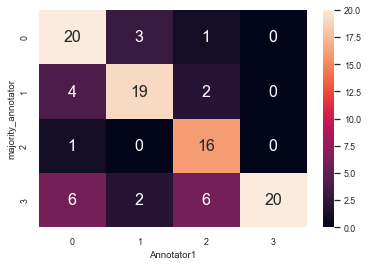

In [200]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_1, majority_annotator)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator1",
       ylabel="majority_annotator")    

[Text(0.5, 13.5, 'Annotator1'), Text(31.5, 0.5, 'majority_annotator')]

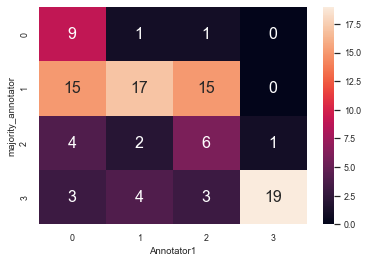

In [188]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_2, majority_annotator)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator1",
       ylabel="majority_annotator")    

[Text(0.5, 13.5, 'Annotator3'), Text(31.5, 0.5, 'majority_annotator')]

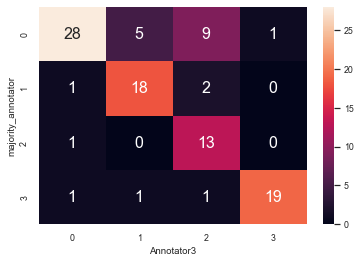

In [190]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_3, majority_annotator)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator3",
       ylabel="majority_annotator")   

[Text(0.5, 13.5, 'Annotator3'), Text(31.5, 0.5, 'majority_annotator')]

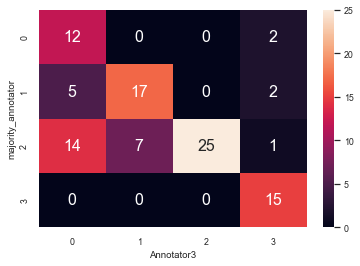

In [191]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_4, majority_annotator)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator3",
       ylabel="majority_annotator")   

[Text(0.5, 13.5, 'Annotator3'), Text(31.5, 0.5, 'majority_annotator')]

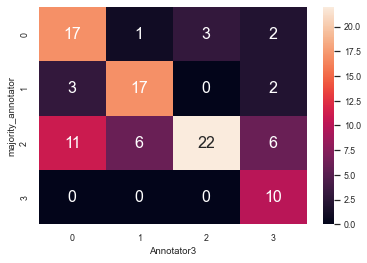

In [192]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_5, majority_annotator)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator3",
       ylabel="majority_annotator")   

### power

In [202]:
power_annotations[:2]

What is your Prolific ID? Please note that this response should auto,5f3c4372d64ff120268a0b0b,62b2476fc924f1a048bd412b,592fbec4cf0d9600010e8a89,594ee6531ebf4800018a4854,60d432ce6e413e7509dd4b78,mode
34958453933492674527,2,2,2,1,2,2.0
3492674531,1,0,0,2,0,0.0


In [210]:
majority_annotate = power_annotations["mode"]

In [205]:
# majority_annotate

In [214]:
len(power_annotations)

68

In [215]:
len(majority_annotate)

68

In [211]:
annotator_1 = list(power_annotations['5f3c4372d64ff120268a0b0b'])
annotator_2 = list(power_annotations['62b2476fc924f1a048bd412b'])
annotator_3 = list(power_annotations['592fbec4cf0d9600010e8a89'])
annotator_4 = list(power_annotations['594ee6531ebf4800018a4854'])
annotator_5 = list(power_annotations['60d432ce6e413e7509dd4b78'])

[Text(0.5, 13.5, 'Annotator1'), Text(31.5, 0.5, 'majority_annotator')]

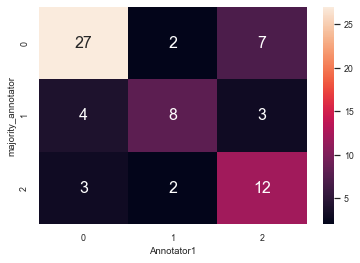

In [216]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_1, majority_annotate)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator1",
       ylabel="majority_annotator")    

[Text(0.5, 13.5, 'Annotator1'), Text(31.5, 0.5, 'majority_annotator')]

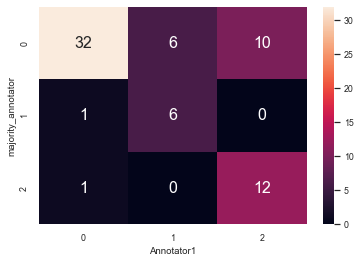

In [217]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_2, majority_annotate)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator1",
       ylabel="majority_annotator")    

[Text(0.5, 13.5, 'Annotator1'), Text(31.5, 0.5, 'majority_annotator')]

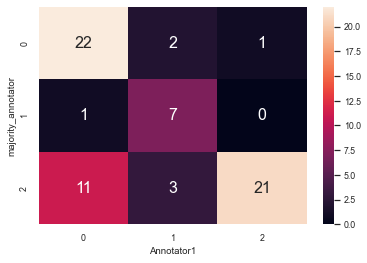

In [219]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_3, majority_annotate)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator1",
       ylabel="majority_annotator")    

[Text(0.5, 13.5, 'Annotator1'), Text(31.5, 0.5, 'majority_annotator')]

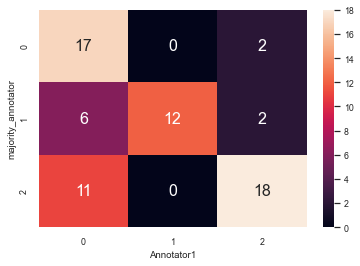

In [220]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_4, majority_annotate)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator1",
       ylabel="majority_annotator")    

[Text(0.5, 13.5, 'Annotator1'), Text(31.5, 0.5, 'majority_annotator')]

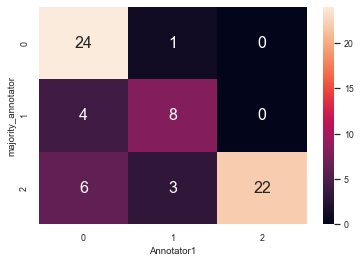

In [221]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_5, majority_annotate)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator1",
       ylabel="majority_annotator")    

### threat?

In [223]:
threat_annotations[:2]

What is your Prolific ID? Please note that this response should auto,5f3c4372d64ff120268a0b0b,62b2476fc924f1a048bd412b,592fbec4cf0d9600010e8a89,594ee6531ebf4800018a4854,60d432ce6e413e7509dd4b78
34958453933492674527,0,0,1,0,1
3492674531,0,0,0,1,0


In [224]:
annotator_1 = list(threat_annotations['5f3c4372d64ff120268a0b0b'])
annotator_2 = list(threat_annotations['62b2476fc924f1a048bd412b'])
annotator_3 = list(threat_annotations['592fbec4cf0d9600010e8a89'])
annotator_4 = list(threat_annotations['594ee6531ebf4800018a4854'])
annotator_5 = list(threat_annotations['60d432ce6e413e7509dd4b78'])

In [230]:
majority_annotator = threat_annotations.mode(axis='columns').values.tolist()

In [231]:
majority_annotate = [item[0] for item in majority_annotator]

[Text(0.5, 13.5, 'Annotator1'), Text(31.5, 0.5, 'majority_annotator')]

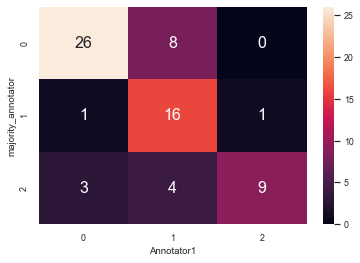

In [232]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_1, majority_annotate)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator1",
       ylabel="majority_annotator")    

[Text(0.5, 13.5, 'Annotator1'), Text(31.5, 0.5, 'majority_annotator')]

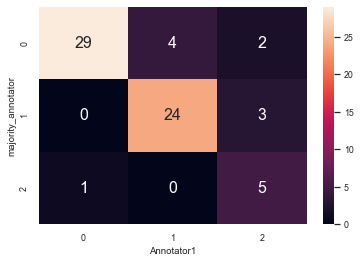

In [233]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_2, majority_annotate)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator1",
       ylabel="majority_annotator")    

[Text(0.5, 13.5, 'Annotator1'), Text(31.5, 0.5, 'majority_annotator')]

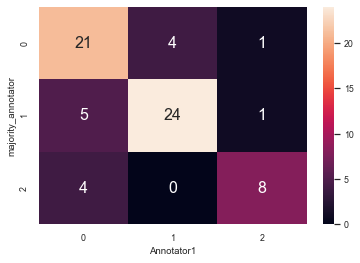

In [234]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_3, majority_annotate)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator1",
       ylabel="majority_annotator")    

[Text(0.5, 13.5, 'Annotator1'), Text(31.5, 0.5, 'majority_annotator')]

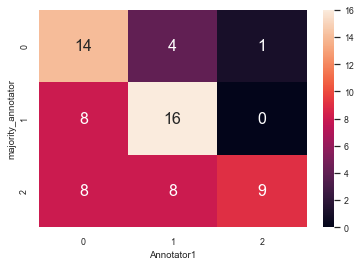

In [235]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_4, majority_annotate)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator1",
       ylabel="majority_annotator")    

[Text(0.5, 13.5, 'Annotator1'), Text(31.5, 0.5, 'majority_annotator')]

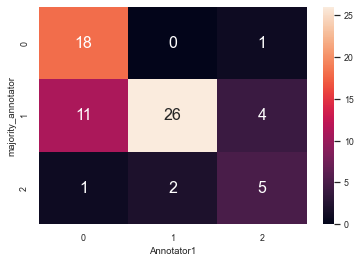

In [236]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(annotator_5, majority_annotate)

sns.set(font_scale=0.8)
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set(xlabel="Annotator1",
       ylabel="majority_annotator")    